# Uber Data Analysis Project

- Welcome to the Uber Data Analysis project!
- Explore the Uber and Lyft Dataset from Boston, MA.
- Goal: Uncover ride patterns, pricing dynamics, and predictions.
- Steps:
  - Exploratory Data Analysis (EDA)
  - Visualize insights: rides, prices, weather
  - Feature engineering for improved modeling
  - Build and evaluate predictive machine learning models
- Let's dive in and discover the data-driven stories within!

In [1]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
data = pd.read_csv("./rideshare_kaggle.csv")

### About the Dataset

This comprehensive dataset spans two months of ride information and encompasses various trip environment details for Uber and Lyft rides taken in Boston, MA. 

- **Scope and Context:** The dataset offers a comprehensive look into ride information and contextual details surrounding the trips. Notably, we're focusing on data from Uber rides exclusively.

- **Feature-Rich:** The dataset boasts a total of 57 feature columns. These features cover a spectrum that ranges from essential ride attributes to intricate weather data corresponding to each day.

- **Predictive Endeavors:** One of our project's key objectives is to harness this dataset to construct a regression model. This model aims to predict the price of an Uber ride, given a subset of feature values. The model will make use of a subset of the aforementioned 57 feature columns.

- **Feature Selection:** We'll employ recursive feature elimination (RFE) to distill the most impactful features for our predictive model.

In [3]:
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [4]:
# Display basic info about the dataset
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null

In [5]:
# Display summary statistics of numeric columns
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
          timestamp           hour            day          month  \
count  6.930710e+05  693071.000000  693071.000000  693071.000000   
mean   1.544046e+09      11.619137      17.794365      11.586684   
std    6.891925e+05       6.948114       9.982286       0.492429   
min    1.543204e+09       0.000000       1.000000      11.000000   
25%    1.543444e+09       6.000000      13.000000      11.000000   
50%    1.543737e+09      12.000000      17.000000      12.000000   
75%    1.544828e+09      18.000000      28.000000      12.000000   
max    1.545161e+09      23.000000      30.000000      12.000000   

               price       distance  surge_multiplier       latitude  \
count  637976.000000  693071.000000     693071.000000  693071.000000   
mean       16.545125       2.189430          1.013870      42.338172   
std         9.324359       1.138937          0.091641       0.047840   
min         2.500000       0.020000          1.000000      42.214800   
25%   

In [6]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime         

In [7]:
# Check for duplicates
duplicate_rows = data[data.duplicated()]
print("\nDuplicate Rows:")
duplicate_rows


Duplicate Rows:


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime


In [8]:
# Check unique values in categorical columns
categorical_columns = ['cab_type', 'source', 'destination', 'product_id', 'name', 'icon']
for col in categorical_columns:
    print(f"\nUnique values in '{col}':")
    print(data[col].unique())


Unique values in 'cab_type':
['Lyft' 'Uber']

Unique values in 'source':
['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

Unique values in 'destination':
['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

Unique values in 'product_id':
['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2'
 '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a']

Unique values in 'name':
['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 

## Data Preprocessing

In this data preprocessing step, we'll ensure the dataset is clean and ready for analysis. This involves two key actions:

1. **Filtering Uber Rides:** We'll narrow down our focus to Uber rides exclusively, filtering out other ride types. This enables us to concentrate on the specific ride-sharing service of interest.

2. **Handling Missing Values:** As we explore the dataset, we've identified that all missing values are associated with Taxi rides. Hence, we will drop rows with missing values, as they pertain only to Taxi rides and won't impact our analysis of Uber rides.

By performing these preprocessing actions, we ensure that the dataset is streamlined and devoid of irrelevant data points. This sets the stage for insightful explorations and analysis ahead.

In [9]:
u_data = data[data['cab_type'] == "Uber"]

In [10]:
# Group by 'name' (cab_type) and check for NULL values in 'price' column
null_price_by_name = u_data.groupby('name')['price'].apply(lambda x: x.isnull().any())

print("Cab types (names) with NULL values in 'price' column:")
print(null_price_by_name[null_price_by_name])

Cab types (names) with NULL values in 'price' column:
name
Taxi    True
Name: price, dtype: bool


The presence of a 'True' value for the 'Taxi' cab type validates the occurrence of missing values exclusively within the 'price' column for this particular ride category only.

NULL values indeed pertain solely to 'Taxi' rides. Subsequently, the proposed approach of addressing missing values by omitting relevant rows finds resonance as an effective data preprocessing strategy.

In [11]:
# Fill missing values using .loc indexer
# Create a copy of the DataFrame
uber_data = u_data.copy().dropna()

In [12]:
print(uber_data.isnull().sum())

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

###  Exploratory Data Analysis (EDA)

EDA is a crucial step that allows us to delve into the dataset's intricacies, unveiling patterns, insights, and potential outliers. By visualizing and summarizing data, we gain a comprehensive understanding of its underlying structure, which lays the groundwork for informed decision-making.

In the upcoming cells, we'll craft visualizations to depict relationships between variables, scrutinize distributions, and unearth hidden trends. This phase is pivotal in guiding subsequent actions, including feature engineering and modeling, as we strive to unlock the dataset's full potential.

Text(0.5, 1.0, 'Frequency by Months')

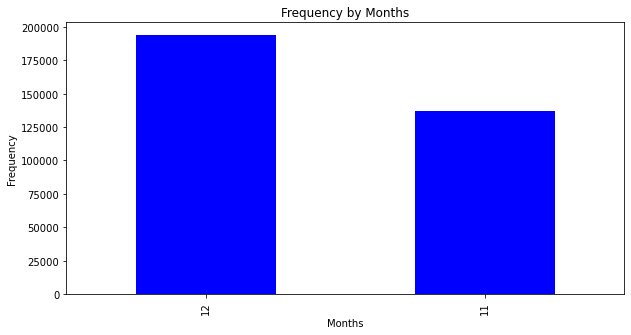

In [13]:
uber_data['month'].value_counts().plot(kind='bar', figsize=(10,5), color='blue')
plt.xlabel("Months")
plt.ylabel("Frequency")
plt.title("Frequency by Months")

As described earlier, the dataset contains ride details about two months only. However, more rides were ordered in Decemnber as compared to November in 2018.  

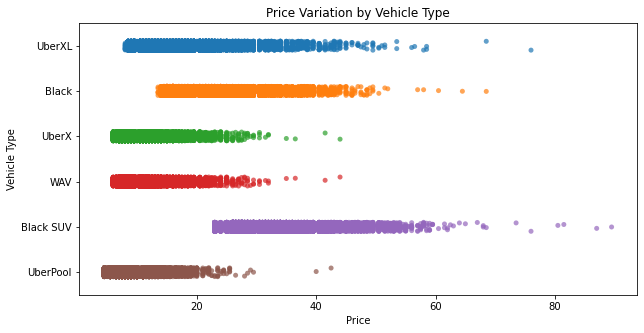

In [14]:
# Create a strip plot for price variation by vehicle name
plt.figure(figsize=(10, 5))
sns.stripplot(data=uber_data, y='name', x='price', alpha=0.7)
plt.title('Price Variation by Vehicle Type')
plt.ylabel('Vehicle Type')
plt.xlabel('Price')
plt.show()

This suggests that UberPool is usually cheaper as compared to other vehicles.

In [15]:
print("Vehicle      Number of Rides")
uber_data['name'].value_counts()

Vehicle      Number of Rides


UberXL       55096
WAV          55096
Black SUV    55096
Black        55095
UberX        55094
UberPool     55091
Name: name, dtype: int64

Text(0, 0.5, 'Frequency')

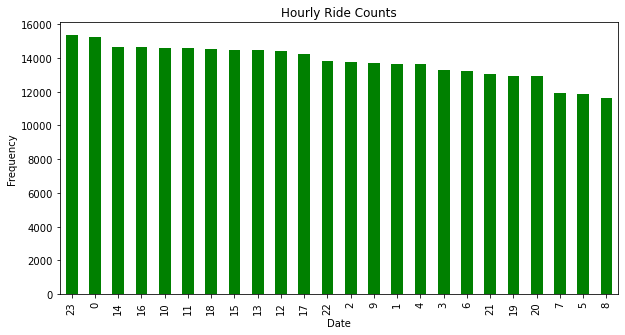

In [16]:
# Hourly Ride counts
uber_data['hour'].value_counts().plot(kind='bar', figsize=(10,5), color='green')
plt.title("Hourly Ride Counts")
plt.xlabel("Date")
plt.ylabel("Frequency")

Text(0.5, 1.0, 'Number of Trips vs Days')

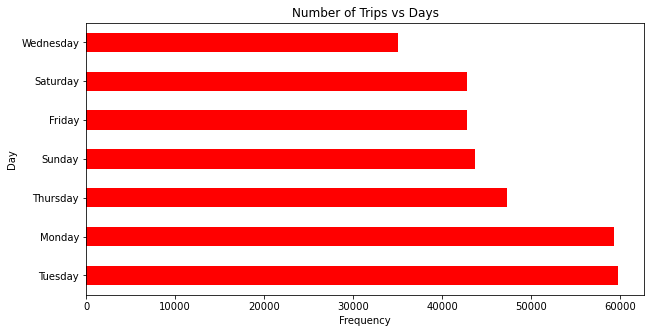

In [17]:
# Ride Counts by Day
day_week = [calendar.day_name[x.dayofweek] for x in
            pd.to_datetime(uber_data['datetime'],format = "%Y/%m/%d %H:%M:%S")]
day_week = pd.Series(day_week)

days = day_week.value_counts()

days.plot (kind='barh', color='red', figsize= (10, 5))
plt.xlabel('Frequency')
plt.ylabel('Day')
plt.title('Number of Trips vs Days')

Curiously, a higher volume of rides is requested during weekdays, specifically on Monday and Tuesday, surpassing other days. This trend could point towards bustling business engagements or nocturnal excursions, aligning with our observations from the preceding graph.

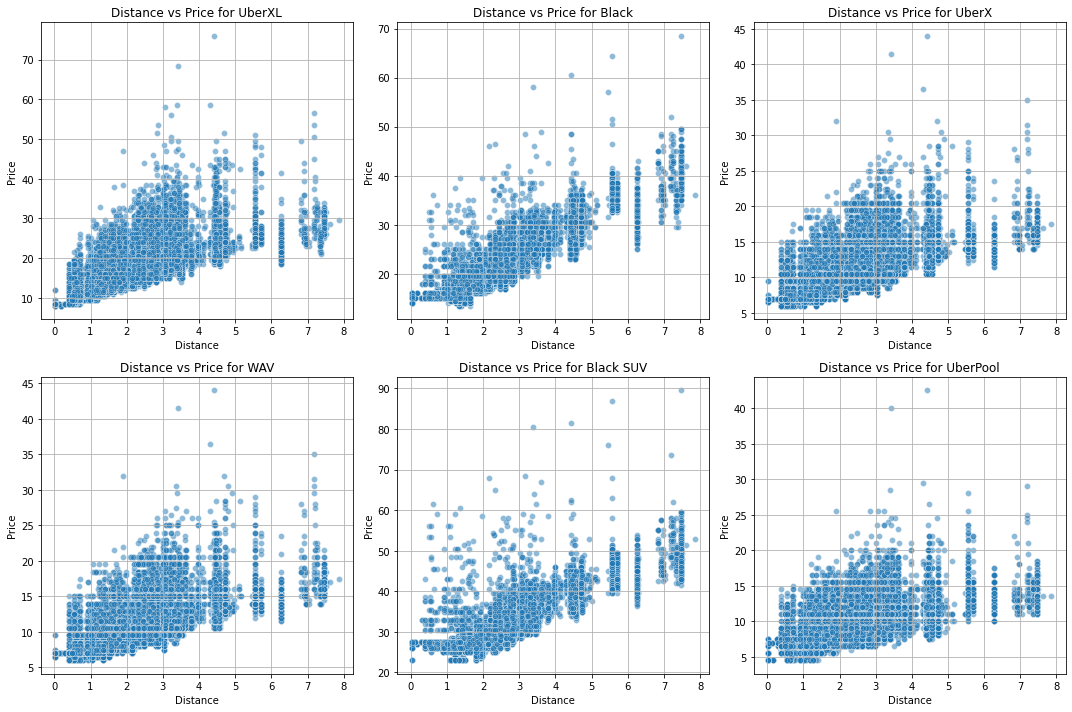

In [18]:
# Unique values in the 'name' column (vehicle types)
vehicle_types = uber_data['name'].unique()

# Create subplots for all vehicle types
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()  # Flatten the 2D array of subplots

for i, vehicle_type in enumerate(vehicle_types):
    # Filter data for the current vehicle type
    subset = uber_data[uber_data['name'] == vehicle_type]
    
    # Create a scatter plot for distance vs price for the current vehicle type
    sns.scatterplot(data=subset, x='distance', y='price', alpha=0.5, ax=axes[i])
    axes[i].set_title(f'Distance vs Price for {vehicle_type}')
    axes[i].set_xlabel('Distance')
    axes[i].set_ylabel('Price')
    axes[i].grid()

plt.tight_layout()
plt.show()

This highlights distance as a significant factor, as prices often correlate with distance. While several other factors come into play, distance maintains its prominence. This realization also inspires the creation of a new feature—price divided by distance—which we'll explore in due course.

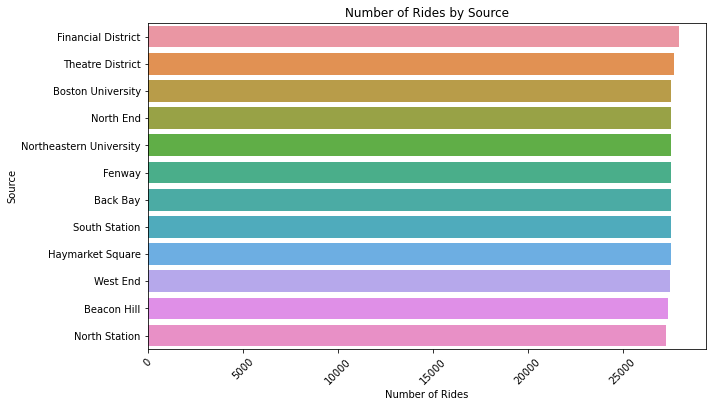

In [19]:
# Create a countplot for ride frequency by source
plt.figure(figsize=(10, 6))
sns.countplot(data=uber_data, y='source', order=uber_data['source'].value_counts().index)
plt.title('Number of Rides by Source')
plt.ylabel('Source')
plt.xlabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()

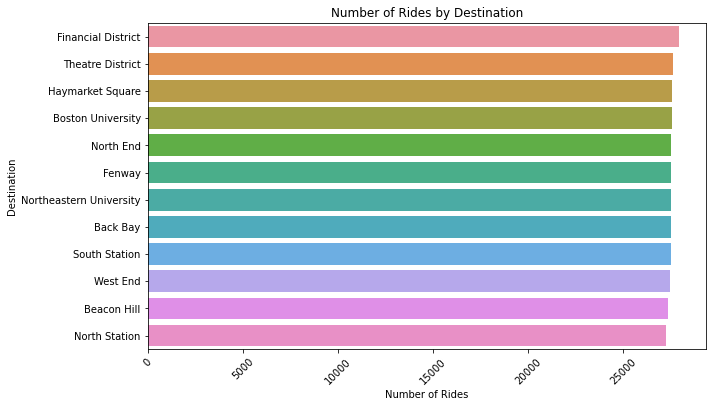

In [20]:
# Create a countplot for ride frequency by destination
plt.figure(figsize=(10, 6))
sns.countplot(data=uber_data, y='destination', order=uber_data['destination'].value_counts().index)
plt.title('Number of Rides by Destination')
plt.ylabel('Destination')
plt.xlabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()

Furthermore, we observe a lack of distinctively busy pickup or drop-off areas in Boston. Most favored locations exhibit similar volumes of both pickup and drop-off requests. Notably, the Financial District, serving as the city's business hub, experiences slightly heightened activity. This observation aligns with the notion of afternoon business meetings on Mondays and Tuesdays.

Text(0.5, 1.0, 'Rides per Weather Forecast')

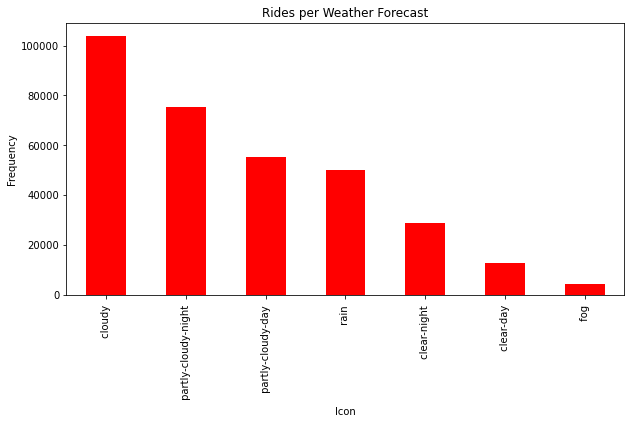

In [21]:
# Weather Analysis
uber_data['icon'].value_counts().plot(kind='bar', figsize=(10,5), color='red')
plt.xlabel("Icon")
plt.ylabel("Frequency")
plt.title("Rides per Weather Forecast")

### Feature Engineering

Introducing a new feature day_of_week to check if the weekdays or weekends affect the prediction.

In [22]:
# Convert datetime values to days of the week

# this approach generates NaN values
# day_week = [calendar.day_name[x.dayofweek] for x in pd.to_datetime(uber_data_copy['datetime'], format="%Y-%m-%d %H:%M:%S")]

uber_data = uber_data.copy()
# Convert datetime values to days of the week
uber_data['day_of_week'] = pd.to_datetime(uber_data['datetime'], format="%Y-%m-%d %H:%M:%S").dt.day_name()

In [23]:
uber_data

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,day_of_week
12,009e9c53-074d-43cf-aef2-0fbc7a47ed3d,1.543616e+09,22,30,11,2018-11-30 22:13:01,America/New_York,North End,West End,Uber,...,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600,Friday
13,23f145da-f0c1-4d1f-a184-496bc003a7db,1.544698e+09,10,13,12,2018-12-13 10:50:11,America/New_York,North End,West End,Uber,...,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800,Thursday
14,357559cb-8c58-4278-a41a-e33b2e0997a3,1.544729e+09,19,13,12,2018-12-13 19:15:03,America/New_York,North End,West End,Uber,...,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800,Thursday
15,50ef1165-9d23-416c-a65c-18906207b295,1.545005e+09,23,16,12,2018-12-16 23:55:11,America/New_York,North End,West End,Uber,...,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800,Sunday
16,91c4861c-1780-42b0-bca1-bbd64a422cc3,1.544748e+09,0,14,12,2018-12-14 00:40:07,America/New_York,North End,West End,Uber,...,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,353e6566-b272-479e-a9c6-98bd6cb23f25,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,Saturday
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,Saturday
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,Saturday
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800,Saturday


### Label Encoding

In the data preprocessing phase, we employ label encoding to transform categorical features into numerical representations.

Label encoding assigns a unique numerical label to each category within a feature, thus enabling algorithms to process categorical data as input. This transformation bridges the gap between categorical features and machine learning algorithms and paves the way for seamless model training and predictions.

In [24]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [25]:
uber_data['long_summary']= label_encoder.fit_transform(uber_data['long_summary'])
uber_data['short_summary']= label_encoder.fit_transform(uber_data['short_summary'])
uber_data['timezone']= label_encoder.fit_transform(uber_data['timezone'])
uber_data ['datetime']= label_encoder.fit_transform(uber_data['datetime'])
uber_data['id']= label_encoder.fit_transform(uber_data['id'])

In [26]:
uber_data['destination']= label_encoder.fit_transform(uber_data['destination'])

destination_map = {}
print("Class mapping of Destination: ")
for i,item in enumerate(label_encoder.classes_):
    destination_map[item] = i
    print(item, "-->",i)

Class mapping of Destination: 
Back Bay --> 0
Beacon Hill --> 1
Boston University --> 2
Fenway --> 3
Financial District --> 4
Haymarket Square --> 5
North End --> 6
North Station --> 7
Northeastern University --> 8
South Station --> 9
Theatre District --> 10
West End --> 11


In [27]:
uber_data['product_id']= label_encoder.fit_transform(uber_data['product_id'])

product_id_map = {}
print("Class mapping of Product_Id: ")
for i,item in enumerate(label_encoder.classes_):
    product_id_map[item] = i
    print(item, "-->",i)

Class mapping of Product_Id: 
55c66225-fbe7-4fd5-9072-eab1ece5e23e --> 0
6c84fd89-3f11-4782-9b50-97c468b19529 --> 1
6d318bcc-22a3-4af6-bddd-b409bfce1546 --> 2
6f72dfc5-27f1-42e8-84db-ccc7a75f6969 --> 3
997acbb5-e102-41e1-b155-9df7de0a73f2 --> 4
9a0e7b09-b92b-4c41-9779-2ad22b4d779d --> 5


In [28]:
uber_data['name']= label_encoder.fit_transform(uber_data['name'])

cab_name_map = {}
print("Class mapping of Name: ")
for i,item in enumerate(label_encoder.classes_):
    cab_name_map[item] = i
    print(item, "-->",i)

Class mapping of Name: 
Black --> 0
Black SUV --> 1
UberPool --> 2
UberX --> 3
UberXL --> 4
WAV --> 5


In [29]:
uber_data['source']= label_encoder.fit_transform(uber_data['source'])

source_map = {}
print("Class mapping of Source: ")
for i,item in enumerate(label_encoder.classes_):
    source_map[item] = i
    print(item, "-->",i)

Class mapping of Source: 
Back Bay --> 0
Beacon Hill --> 1
Boston University --> 2
Fenway --> 3
Financial District --> 4
Haymarket Square --> 5
North End --> 6
North Station --> 7
Northeastern University --> 8
South Station --> 9
Theatre District --> 10
West End --> 11


In [30]:
uber_data['icon']= label_encoder.fit_transform(uber_data['icon'])

icon_map = {}
print("Class mapping of Source: ")
for i,item in enumerate(label_encoder.classes_):
    icon_map[item] = i
    print(item, "-->",i)

Class mapping of Source: 
 clear-day  --> 0
 clear-night  --> 1
 cloudy  --> 2
 fog  --> 3
 partly-cloudy-day  --> 4
 partly-cloudy-night  --> 5
 rain  --> 6


In [31]:
uber_data['day_of_week']= label_encoder.fit_transform(uber_data['day_of_week'])

print("Class mapping of Days: ")
for i,item in enumerate(label_encoder.classes_):
    print(item, "-->",i)

Class mapping of Days: 
Friday --> 0
Monday --> 1
Saturday --> 2
Sunday --> 3
Thursday --> 4
Tuesday --> 5
Wednesday --> 6


In [32]:
# Creating X and y,
# X containing the features and y containing the labels (price)
X = uber_data.drop(['price','cab_type'],axis=1)
y = uber_data["price"]

In [33]:
print(f"Shape of X: {X.shape}")
X.head()

Shape of X: (330568, 56)


,id,timestamp,hour,day,month,datetime,timezone,source,destination,product_id,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,day_of_week
12,854,1.543616e+09,22,30,11,8565,0,6,11,3,...,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600,0
13,46471,1.544698e+09,10,13,12,17198,0,6,11,1,...,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800,4
14,69269,1.544729e+09,19,13,12,18045,0,6,11,0,...,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800,4
15,104739,1.545005e+09,23,16,12,25775,0,6,11,5,...,1544979600,39.22,1544954400,43.83,1544990400,33.98,1545019200,38.38,1544986800,3
16,188337,1.544748e+09,0,14,12,18593,0,6,11,2,...,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800,0


In [34]:
print(f"Shape of y: {y.shape}")
y.head()

Shape of y: (330568,)


12    12.0
13    16.0
14     7.5
15     7.5
16    26.0
Name: price, dtype: float64

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [36]:
print(f"Shape of Training Data: {X_train.shape}\nShape of Test Data: {X_test.shape}")

Shape of Training Data: (264454, 56)
Shape of Test Data: (66114, 56)


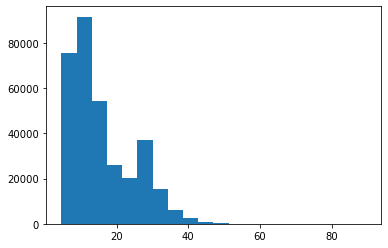

In [37]:
plt.hist(y,bins = 20)
plt.show()

### Model Selection and Hyperparameter Tuning

- **Linear Regression**: A simple linear model used for regression tasks.
- **Decision Tree Regressor**: A tree-based model that learns decision rules from the data.
- **Random Forest Regressor**: An ensemble model composed of multiple decision trees for improved accuracy.
- **XGBoost Regressor**: A gradient boosting model known for high performance and robustness.

In this phase, we explore hyperparameter tuning to optimize each model's performance.


In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn import ensemble

In [40]:
#Creating model
reg = LinearRegression()
#Fitting training data
reg = reg.fit(X_train, y_train)
reg.score(X_train, y_train)

0.4179522251192015

In [41]:
decision = DecisionTreeRegressor(random_state = 0, max_depth = 9)  
decision.fit(X_train , y_train) 
decision.score(X_test, y_test)

0.9491640547455555

In [34]:
print ("Random Forest...")
random_forest = RandomForestRegressor (n_estimators = 20, random_state = 0)
random_forest.fit (X_train, y_train)
print (random_forest.score(X_test, y_test))

Random Forest...
0.9412341999394557


In [32]:
print ("Random Forest...")
random_forest = RandomForestRegressor (n_estimators = 30, random_state = 0, max_depth = 20, 
                                       min_samples_split = 5)
random_forest.fit (X_train, y_train)
print (random_forest.score(X_test, y_test)) 

Random Forest...
0.9461453265196568


In [33]:
print ("Random Forest...")
random_forest = RandomForestRegressor (n_estimators = 30, random_state = 0, max_depth = 20, 
                                       min_samples_split = 10, max_features = 'auto')
random_forest.fit (X_train, y_train)
print (random_forest.score(X_test, y_test)) 

Random Forest...
0.9470506433127038


In [68]:
import xgboost
xgb = xgboost.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=2,
    max_depth=5,
)
xgb.fit(X_train, y_train)
xgb.score(X_test,y_test)

0.9520712463029615

In [71]:
pd.DataFrame(regressor.feature_importances_.reshape(1, -1), columns=(uber_data.columns.values)[:-2])

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax
0,0.000182,0.000301,0.00023,0.000416,0.0,0.000182,0.0,0.001028,0.001264,0.162908,...,0.0,0.000293,0.000195,0.000164,0.0,0.000311,0.0,0.000239,0.0,0.00019


We can also explore the relative importance of features in predicting ride prices using XGBoost. It can be observed that source, destination and cab_types are among the most important features.

In [72]:
xgb = xgboost.XGBRegressor(
    n_estimators=200,
    reg_lambda=1,
    gamma=2,
    max_depth=7,
)
xgb.fit(X_train, y_train)
xgb.score(X_test,y_test)

0.9536108173945729

In [73]:
xgb = xgboost.XGBRegressor(
    n_estimators=300,
    reg_lambda=1,
    gamma=2,
    max_depth=9,
)
xgb.fit(X_train, y_train)
xgb.score(X_test,y_test)

0.954189527818327

In [75]:
xgb = xgboost.XGBRegressor(
    n_estimators=500,
    reg_lambda=1,
    gamma=2,
    max_depth=9,
)
xgb.fit(X_train, y_train)
xgb.score(X_test,y_test)

0.9541433248432315

In [79]:
xgb = xgboost.XGBRegressor(
    n_estimators=300,
    reg_lambda=1,
    gamma=2,
    max_depth=11,
)
xgb.fit(X_train, y_train)
xgb.score(X_test,y_test)

0.9524974084657277

The model overfits as we try to increase the values of n_estimators and max_depth even further.

In [42]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn import ensemble

def train_test_models (X_train, y_train, X_test, y_test):
    print("Linear Regression...")
    lr_model = LinearRegression ()
    lr_model = lr_model.fit(X_train, y_train) 
    print (lr_model.score (X_test, y_test))
    
    print("Decision Tree...")
    dt_model = DecisionTreeRegressor (random_state = 0, max_depth=9)
    dt_model.fit (X_train , y_train)
    print(dt_model.score(X_test, y_test))
    
    print ("Random Forest...")
    random_forest = RandomForestRegressor (n_estimators = 30, random_state = 0, max_depth = 20, 
                                       min_samples_split = 10, max_features = 'auto')
    random_forest.fit (X_train, y_train)
    print (random_forest.score(X_test, y_test)) 
    
    print("XGBoost...")
    xgb = xgboost.XGBRegressor(n_estimators=300,reg_lambda=1,gamma=2,max_depth=9)
    xgb.fit(X_train, y_train)
    print(xgb.score(X_test,y_test))
    
#     print ("GBM...")
#     gbm = ensemble.GradientBoostingRegressor (n_estimators = 500, max_depth = 9) 
#     gbm.fit (X_train, y_train)
#     print(gbm.score(X_test, y_test))
    
    return [lr_model, dt_model, random_forest, xgb]

In [43]:
# Using day_week feature
model_list = train_test_models(X_train, y_train, X_test, y_test)

Linear Regression...
0.41133419327105447
Decision Tree...
0.9491640547455555
Random Forest...
0.9470188778057154
XGBoost...
0.954189527818327


In [44]:
# Creating X and y without day_of_week
X = uber_data.drop(['price','cab_type','day_of_week'],axis=1)
y = uber_data["price"]

from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [45]:
model_list = train_test_models(X_train, y_train, X_test, y_test)

Linear Regression...
0.4113340372196945
Decision Tree...
0.9491697000133335
Random Forest...
0.9470506433127038
XGBoost...
0.953814107177136


It can be observed that the accuracy doesn't change a lot if we remove the day_of_week feature. This also implies that any weekdays or weekends do not impact the prices.

In [46]:
def feature_eliminate(trained_model, X, y, n_features=40):
    rfe = RFE(trained_model, n_features_to_select= n_features)
    rfe = rfe.fit(X, y)
    X_new = X[X.columns[rfe.support_]]
    X_train, X_test, y_train, y_test = train_test_split(X_new, y,
                                                        test_size=0.2,
                                                        random_state=0)
    new_fit = trained_model.fit(X_train, y_train)
    print(new_fit.score(X_test, y_test))
    
    return X_new

In [47]:
n_features = [25, 20, 15, 10, 5]
model_list = model_list[:2]

for model in model_list:
    model.fit(X_train,y_train)
    for nf in n_features:
        print(f"{model} → {nf} features")
        X_new = feature_eliminate(model, X, y, nf)

LinearRegression() → 25 features
0.41471752461630906
LinearRegression() → 20 features
0.4147479888107414
LinearRegression() → 15 features
0.41476932994890026
LinearRegression() → 10 features
0.4148450174496794
LinearRegression() → 5 features
0.41450459238898507
DecisionTreeRegressor(max_depth=9, random_state=0) → 25 features
0.9509856120961797
DecisionTreeRegressor(max_depth=9, random_state=0) → 20 features
0.9508038815943152
DecisionTreeRegressor(max_depth=9, random_state=0) → 15 features
0.9509462131852093
DecisionTreeRegressor(max_depth=9, random_state=0) → 10 features
0.9511678381171261
DecisionTreeRegressor(max_depth=9, random_state=0) → 5 features
0.9517862530240273


In [48]:
# Best Results provided for nf = 5 only
nf = 5
X_new = feature_eliminate(model_list[1], X, y, nf)
X_train, X_test, y_train, y_test = train_test_split(X_new, y,test_size=0.2,random_state=0)

0.9517862530240273


In [49]:
X_train

,source,destination,product_id,name,distance
581056,4,9,3,4,0.39
211880,8,7,1,0,3.22
470710,8,10,2,1,1.89
349798,8,7,1,0,3.20
15779,7,2,5,5,3.01
...,...,...,...,...,...
257788,9,10,2,1,1.30
638947,10,6,5,5,1.57
321085,4,8,5,5,3.30
248163,0,6,4,2,2.84


In [50]:
# Training the models with the new data containing 5 features
model_list = train_test_models(X_train, y_train, X_test, y_test)

Linear Regression...
0.41493743662237026
Decision Tree...
0.9517862530240273
Random Forest...
0.9538033581309114
XGBoost...
0.9546545940604445


XGBoost provides the best accuracy with significant boosting in the traning time as well.

In [51]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import metrics

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(DecisionTreeRegressor(),X_test,y_test,cv=cv)

array([0.94974036, 0.95247044, 0.9509401 , 0.94603246, 0.94940902])

The R-squared scores are all relatively high, with values around 0.95.
This suggests that the model is performing well on the test data and thus it generalizes very well to unseen data.

MAE :   5.325014643792723
MSE :   42.71014141427865
RMAE :   6.535299642271856


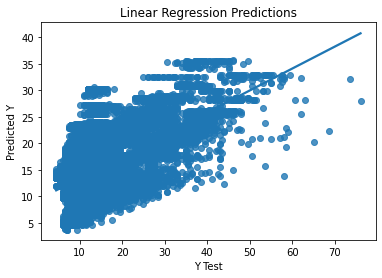

In [52]:
# Linear Regression
lr_predictions = model_list[0].predict(X_test)
sns.regplot(x=y_test,y=lr_predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title("Linear Regression Predictions")

print('MAE :'," ", metrics.mean_absolute_error(y_test,lr_predictions))
print('MSE :'," ", metrics.mean_squared_error(y_test,lr_predictions))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,lr_predictions)))

MAE :   1.1664820121241024
MSE :   3.519650855060642
RMAE :   1.8760732541829601


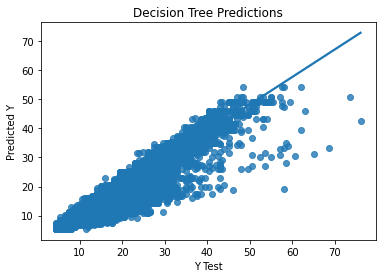

In [53]:
# Decision Tree
dt_predictions = model_list[1].predict(X_test)
sns.regplot(x=y_test,y=dt_predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title("Decision Tree Predictions")

print('MAE :'," ", metrics.mean_absolute_error(y_test,dt_predictions))
print('MSE :'," ", metrics.mean_squared_error(y_test,dt_predictions))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,dt_predictions)))

MAE :   1.1310678036147326
MSE :   3.3724002023011654
RMAE :   1.8364095954609814


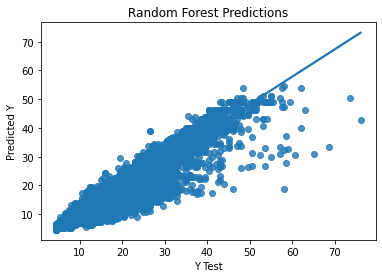

In [54]:
# Random Forest Predictions
rf_predictions = model_list[2].predict(X_test)
sns.regplot(x=y_test,y=rf_predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title("Random Forest Predictions")

print('MAE :'," ", metrics.mean_absolute_error(y_test,rf_predictions))
print('MSE :'," ", metrics.mean_squared_error(y_test,rf_predictions))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,rf_predictions)))

MAE :   1.1237491397051036
MSE :   3.310259143886183
RMAE :   1.819411757653056


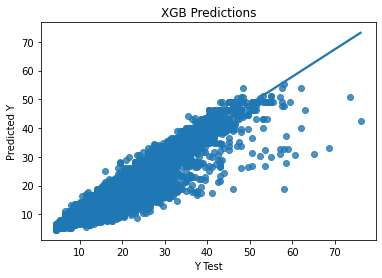

In [55]:
# GBM Predictions
xgb_predictions = model_list[3].predict(X_test)
sns.regplot(x=y_test,y=xgb_predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title("XGB Predictions")

print('MAE :'," ", metrics.mean_absolute_error(y_test,xgb_predictions))
print('MSE :'," ", metrics.mean_squared_error(y_test,xgb_predictions))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,xgb_predictions)))

In [56]:
def predict_price(model, source, destination, product_id, cab_name, distance,
                  source_map, destination_map, product_id_map, cab_name_map):
    
    # Check if the provided values are in the mapping dictionaries
    if source not in source_map:
        raise ValueError("Invalid source value")
    if destination not in destination_map:
        raise ValueError("Invalid destination value")
    if product_id not in product_id_map:
        raise ValueError("Invalid product_id value")
    if cab_name not in cab_name_map:
        raise ValueError("Invalid cab_name value")
    
    # Convert distance to float (assuming it's in string format)
    try:
        distance = float(distance)
    except ValueError:
        raise ValueError("Invalid distance value. It should be a float.")
    
    # Prepare the input features as a list or array
    input_features = pd.DataFrame({
        'source': [source_map[source]],
        'destination': [destination_map[destination]],
        'product_id': [product_id_map[product_id]],
        'name': [cab_name_map[cab_name]],
        'distance': [distance]
    })
    
    # Use the specified model to make a price prediction
    predicted_price = model.predict(input_features)[0]
    
    # Print the result in a nice format
    print(f"Predicted Price: ${predicted_price:.2f}")
    
    # Return the predicted price
    return predicted_price

#### Choose the features from the below list for price prediction.

**Source:** Back Bay, Beacon Hill, Boston University, Fenway, Financial District, Haymarket Square, North End, North Station, Northeastern University, South Station, Theatre District, West End

**Destination:** Financial District, Theatre District, Haymarket Square, Boston University, North End, Fenway, Northeastern University, Back Bay, South Station, West End, Beacon Hill, North Station

**Cab Names:** UberXL, WAV, Black SUV, Black, Taxi, UberX, UberPool

**Product_Ids:** 6f72dfc5-27f1-42e8-84db-ccc7a75f6969, 9a0e7b09-b92b-4c41-9779-2ad22b4d779d, 6d318bcc-22a3-4af6-bddd-b409bfce1546, 6c84fd89-3f11-4782-9b50-97c468b19529, 8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a, 55c66225-fbe7-4fd5-9072-eab1ece5e23e, 997acbb5-e102-41e1-b155-9df7de0a73f2


In [62]:
# predict_price(model, source, destination, product_id, cab_name, distance,
#                  source_map, destination_map, product_id_map, cab_name_map)
price = predict_price(model_list[2] ,
              "Financial District", "Theatre District", "6f72dfc5-27f1-42e8-84db-ccc7a75f6969","UberXL",5.6,
              source_map, destination_map, product_id_map, cab_name_map
             )

Predicted Price: $23.85
